In [1]:
import xarray as xr
import gsw
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
#https://www.nodc.noaa.gov/OC5/woa13/
#http://data.nodc.noaa.gov/woa/WOA13/DOC/woa13documentation.pdf
# In situ temperatures used for WOA13 are not converted from their original scale,
# so there is a mix of IPTS-48, IPTS-68, and ITS-90 (and pre IPTS-48 temperatures).
# The differences between scales are small (on the order of 0.01°C) and should not
# have much effect on the climatological means, except, possibly at very deep depths.
# Values for salinity are on the Practical salinity scale (PSS-78). Pre-1978 salinity
# values converted from conductivity may have used a different salinity scale. Pre-
# conductivity salinities use the Knudsen metnod. A description of PSS-78 and its 
# predecessors can be found here:
# Millero, F.J. 2010. History of the equation of state of seawater. Oceanography,
# 23(3):1833, doi:10.5670/oceanog.2010.21. Lewis, E. L., 1980, The Practical Salinity 
# Scale and its Antecedents, IEEE Journal of Oceanic Engineering, vol. OE-5, No. 1.

variables = {'temperature': ('decav', 't', 'v2'), 'salinity': ('decav','s','v2'),
             'nitrate': ('all','n',''), 'phosphate': ('all','p',''),
             'silicate': ('all','i',''), 'oxygen': ('all','o',''),
             'o2sat': ('all','O',''), 'AOU': ('all','A','')}

prefix = 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/'
suffix = '01_01'
urls = [ prefix + vname + '/netcdf/' + dname +
        '/1.00/woa13_' + dname + '_' + v + suffix + suf + '.nc'
         for (vname, (dname, v, suf)) in variables.iteritems() ]

In [6]:
urls

['https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/o2sat/netcdf/all/1.00/woa13_all_O01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/AOU/netcdf/all/1.00/woa13_all_A01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/phosphate/netcdf/all/1.00/woa13_all_p01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/silicate/netcdf/all/1.00/woa13_all_i01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/temperature/netcdf/decav/1.00/woa13_decav_t01_01v2.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/oxygen/netcdf/all/1.00/woa13_all_o01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/nitrate/netcdf/all/1.00/woa13_all_n01_01.nc',
 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2/salinity/netcdf/decav/1.00/woa13_decav_s01_01v2.nc']

In [7]:
dsets = [xr.open_dataset(url, decode_times=False) for url in urls]
ds = xr.merge(dsets)
ds

MergeError: conflicting values for variable u'depth_bnds' on objects to be combined:
first value: <xarray.Variable (depth: 57, nbounds: 2)>
array([[    0. ,     2.5],
       [    2.5,     7.5],
       [    7.5,    12.5],
       [   12.5,    17.5],
       [   17.5,    22.5],
       [   22.5,    27.5],
       [   27.5,    32.5],
       [   32.5,    37.5],
       [   37.5,    42.5],
       [   42.5,    47.5],
       [   47.5,    52.5],
       [   52.5,    57.5],
       [   57.5,    62.5],
       [   62.5,    67.5],
       [   67.5,    72.5],
       [   72.5,    77.5],
       [   77.5,    82.5],
       [   82.5,    87.5],
       [   87.5,    92.5],
       [   92.5,    97.5],
       [   97.5,   112.5],
       [  112.5,   137.5],
       [  137.5,   162.5],
       [  162.5,   187.5],
       [  187.5,   212.5],
       [  212.5,   237.5],
       [  237.5,   262.5],
       [  262.5,   287.5],
       [  287.5,   312.5],
       [  312.5,   337.5],
       [  337.5,   362.5],
       [  362.5,   387.5],
       [  387.5,   412.5],
       [  412.5,   437.5],
       [  437.5,   462.5],
       [  462.5,   487.5],
       [  487.5,   525. ],
       [  525. ,   575. ],
       [  575. ,   625. ],
       [  625. ,   675. ],
       [  675. ,   725. ],
       [  725. ,   775. ],
       [  775. ,   825. ],
       [  825. ,   875. ],
       [  875. ,   925. ],
       [  925. ,   975. ],
       [  975. ,  1025. ],
       [ 1025. ,  1075. ],
       [ 1075. ,  1125. ],
       [ 1125. ,  1175. ],
       [ 1175. ,  1225. ],
       [ 1225. ,  1275. ],
       [ 1275. ,  1325. ],
       [ 1325. ,  1375. ],
       [ 1375. ,  1425. ],
       [ 1425. ,  1475. ],
       [ 1475. ,  1500. ]], dtype=float32)
Attributes:
    comment: depth bounds
second value: <xarray.Variable (depth: 57, nbounds: 2)>
array([[   0. ,    2.5],
       [   2.5,    7.5],
       [   7.5,   12.5],
       [  12.5,   17.5],
       [  17.5,   22.5],
       [  22.5,   27.5],
       [  27.5,   32.5],
       [  32.5,   37.5],
       [  37.5,   42.5],
       [  42.5,   47.5],
       [  47.5,   52.5],
       [  52.5,   57.5],
       [  57.5,   62.5],
       [  62.5,   67.5],
       [  67.5,   72.5],
       [  72.5,   77.5],
       [  77.5,   82.5],
       [  82.5,   87.5],
       [  87.5,   92.5],
       [  92.5,   97.5],
       [  97.5,  112.5],
       [ 112.5,  137.5],
       [ 137.5,  162.5],
       [ 162.5,  187.5],
       [ 187.5,  212.5],
       [ 212.5,  237.5],
       [ 237.5,  262.5],
       [ 262.5,  287.5],
       [ 287.5,  312.5],
       [ 312.5,  337.5],
       [ 337.5,  362.5],
       [ 362.5,  387.5],
       [ 387.5,  412.5],
       [ 412.5,  437.5],
       [ 437.5,  462.5],
       [ 462.5,  487.5],
       [ 487.5,  500. ],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan]], dtype=float32)
Attributes:
    comment: depth bounds

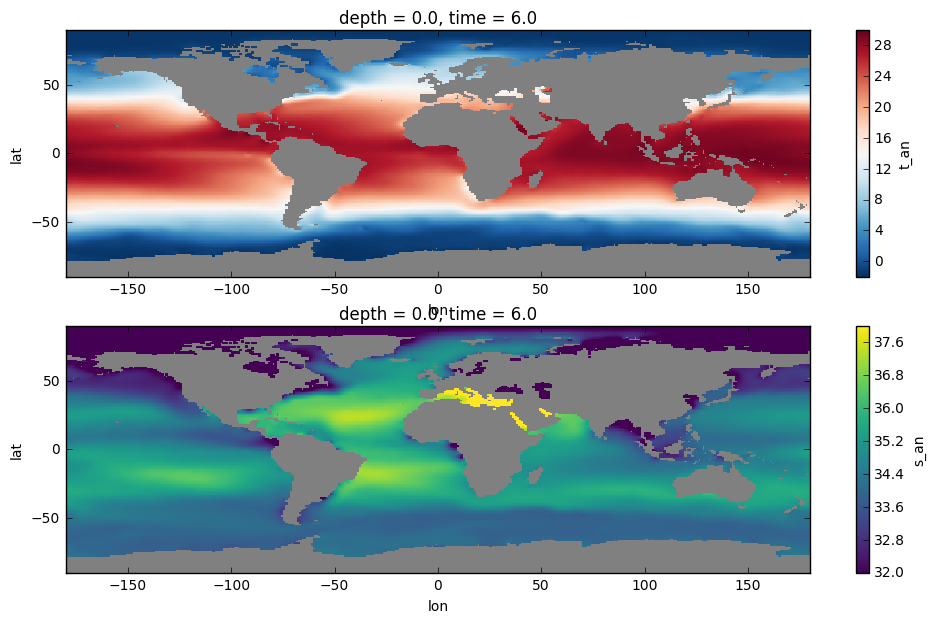

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(12,7), subplot_kw={'axisbg':'0.5'})

tlims = (-2,30)
slims = (32,38)

pc1 = xr.plot.pcolormesh(ds['t_an'][0,0], ax=ax1)
pc1.set_clim(tlims)
pc2 = xr.plot.pcolormesh(ds['s_an'][0,0], ax=ax2)
pc2.set_clim(slims)

[(5000, 0), (5000, 0)]

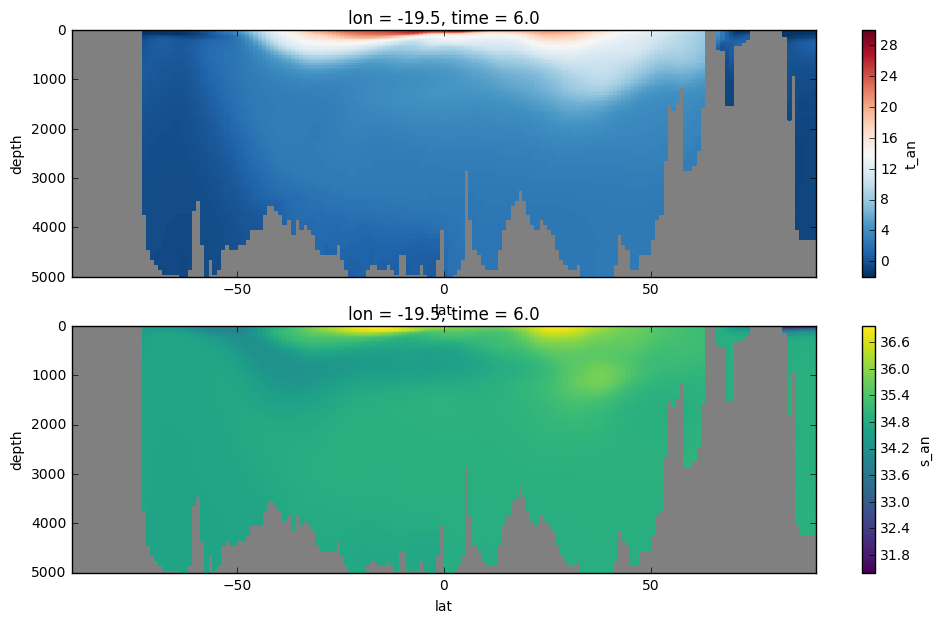

In [15]:
f, axes = plt.subplots(2,1, figsize=(12,7), subplot_kw={'axisbg':'0.5'})
ax1, ax2 = axes

pc1 = xr.plot.pcolormesh(ds['t_an'].sel(time=0, lon=-20, method='nearest'), ax=ax1)
pc1.set_clim(tlims)
pc2 = xr.plot.pcolormesh(ds['s_an'].sel(time=0, lon=-20, method='nearest'), ax=ax2)
#pc2.set_clim(slims)

[ax.set_ylim([5000,0]) for ax in axes]

In [16]:
# turn everythim to numpy arrays
sp = ds.s_an[0].values
temp = ds.t_an[0].values
depth = ds.depth.values[:,np.newaxis,np.newaxis]
pres = depth
lon = ds.lon.values[np.newaxis,np.newaxis,:]
lat = ds.lat.values[np.newaxis,:,np.newaxis]

In [17]:
# absolute salinity
sa = gsw.SA_from_SP(sp, pres, lon, lat)

/home/rpa/python-gsw/gsw/gibbs/conversions.py:63: RuntimeWarning: invalid value encountered in greater
  cond1 = ((p < 100) & (SP > 120))
/home/rpa/python-gsw/gsw/gibbs/conversions.py:64: RuntimeWarning: invalid value encountered in greater
  cond2 = ((p >= 100) & (SP > 42))


In [18]:
# conservative temperature
ct = gsw.CT_from_t(sa, temp, depth)
# potential temperature
pt = gsw.pt0_from_t(sa, temp, depth)

/home/rpa/python-gsw/gsw/gibbs/conversions.py:378: RuntimeWarning: invalid value encountered in greater
  invalid = np.logical_and(p < 100, np.logical_or(t > 80, t < -12))
/home/rpa/python-gsw/gsw/gibbs/conversions.py:378: RuntimeWarning: invalid value encountered in less
  invalid = np.logical_and(p < 100, np.logical_or(t > 80, t < -12))
/home/rpa/python-gsw/gsw/gibbs/conversions.py:381: RuntimeWarning: invalid value encountered in greater
  invalid = np.logical_and(p >= 100, np.logical_or(t > 40, t < -12))
/home/rpa/python-gsw/gsw/gibbs/conversions.py:381: RuntimeWarning: invalid value encountered in less
  invalid = np.logical_and(p >= 100, np.logical_or(t > 40, t < -12))
/home/rpa/.conda/envs/lagrangian_vorticity/lib/python2.7/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/home/rpa/python-gsw/gsw/utilities/utilities.py:285: RuntimeWarning: invalid value encountered in l

In [19]:
# put back into dask
ds['SA'] = xr.DataArray( sa[np.newaxis], coords=ds.s_an.coords)
ds['CT'] = xr.DataArray( ct[np.newaxis], coords=ds.t_an.coords)
ds['PT'] = xr.DataArray( pt[np.newaxis], coords=ds.t_an.coords)


[(5000, 0), (5000, 0)]

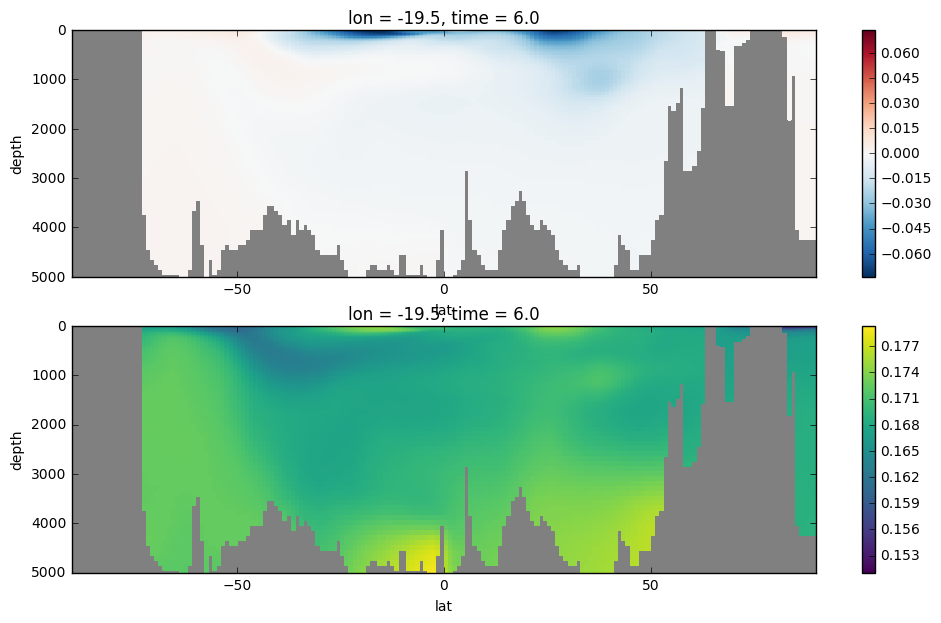

In [20]:
f, axes = plt.subplots(2,1, figsize=(12,7), subplot_kw={'axisbg':'0.5'})
ax1, ax2 = axes

pc1 = xr.plot.pcolormesh((ds['CT'] -  ds['PT']).sel(time=0, lon=-20, method='nearest'), ax=ax1)
#pc1.set_clim(tlims)
pc2 = xr.plot.pcolormesh((ds['SA'] - ds['s_an']).sel(time=0, lon=-20, method='nearest'), ax=ax2)
#pc2.set_clim(slims)

[ax.set_ylim([5000,0]) for ax in axes]

In [21]:
mask = np.ma.masked_invalid(ds.t_an[0].values).mask
fulldepth = mask.sum(axis=0)==0
kmax = np.argmax(mask, axis=0)
bathy = np.ma.masked_invalid(ds.depth_bnds.values[:,0][kmax])
bathy[fulldepth] = ds.depth_bnds.values[-1,1]
da = xr.DataArray(bathy, dims=('lat','lon'), 
                    coords={'lat':ds.lat, 'lon':ds.lon}, name='bathymetry')
ds['bathymetry'] = da

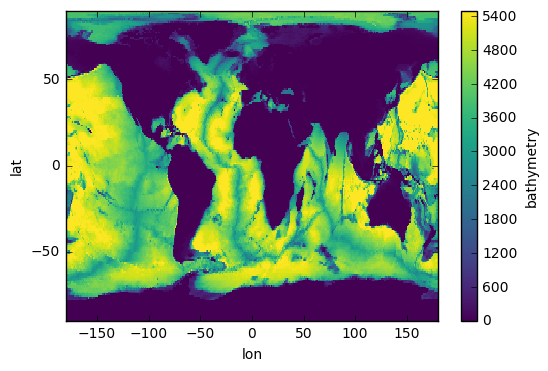

In [22]:
ds.bathymetry.plot.pcolormesh()